<a href="https://colab.research.google.com/github/rendrasatriar/Density-SILO/blob/Belambus_Selatan/Belambus_Selatan_LIM_YLIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [1]:
!pip install --quiet google-cloud-bigquery pandas pyarrow

In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
from google.cloud import bigquery
import pandas as pd

PROJECT_ID = "study-density-silo"
DATASET_ID = "study_density"
TABLE_ID = "raw_data_belambus_selatan"

client = bigquery.Client(project=PROJECT_ID)

def fetch_single_block(project: str, dataset: str, table_id: str, max_rows: int = None) -> pd.DataFrame:
    table_full = f"{project}.{dataset}.{table_id}"
    query = f"SELECT * FROM `{table_full}`"
    job = client.query(query)
    if max_rows:
        return job.result(max_results=max_rows).to_dataframe()
    return job.to_dataframe()

In [3]:
# --- Ambil data satu blok ---
df_block = fetch_single_block(PROJECT_ID, DATASET_ID, TABLE_ID)
print(f"Loaded table: {PROJECT_ID}.{DATASET_ID}.{TABLE_ID}")
print("Rows:", len(df_block))
print("Columns:", len(df_block.columns))
print("Shape:", df_block.shape)
print("-" * 60)

# --- Informasi kolom dan tipe data ---
print("\nColumn info:")
print(df_block.dtypes)
print("\nMemory usage (MB):")
print(df_block.memory_usage(deep=True).sum() / 1024**2)

# --- Statistik numerik singkat ---
print("\nDescriptive statistics (numeric columns):")
display(df_block.describe().transpose())

# --- Distribusi kategori penting ---
if 'GEN_LYR' in df_block.columns:
    print("\nUnique GEN_LYR count:", df_block['GEN_LYR'].nunique())
    print("Top GEN_LYR value counts:")
    display(df_block['GEN_LYR'].value_counts().head(20))

if 'Material' in df_block.columns:
    print("\nUnique Material count:", df_block['Material'].nunique())
    print("Top Material value counts:")
    display(df_block['Material'].value_counts().head(20))

# --- Quick QAQC checks ---
print("\nQAQC checks:")
if {'Interval','From','To'}.issubset(df_block.columns):
    n_bad_interval = len(df_block[(df_block['Interval'] <= 0) | (df_block['To'] <= df_block['From'])])
    print("Rows with Interval <= 0 or To <= From:", n_bad_interval)
else:
    print("Columns Interval/From/To not all present for QAQC checks.")

Loaded table: study-density-silo.study_density.raw_data_belambus_selatan
Rows: 855
Columns: 16
Shape: (855, 16)
------------------------------------------------------------

Column info:
HoleId         object
Hill           object
Hill_Group     object
From          float64
To            float64
Interval      float64
CoreRec       float64
WetW          float64
H2O           float64
DryW          float64
Material       object
Layer          object
NEW_LYR        object
GEN_LYR        object
WTF           float64
DTF           float64
dtype: object

Memory usage (MB):
0.3773632049560547

Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
From,855.0,5.922185,3.674509,0.000000,3.000000,6.000000,8.675000,17.000000
To,855.0,6.635050,3.670369,0.300000,3.740000,6.400000,9.000000,18.000000
Interval,855.0,0.712865,0.294277,0.120000,0.450000,0.700000,1.000000,1.500000
CoreRec,855.0,0.991234,0.124041,0.260000,1.000000,1.000000,1.000000,3.100000
WetW,855.0,3.850371,1.839270,0.400000,2.295000,3.820000,5.206500,10.265000
H2O,855.0,23.257950,15.081707,0.639000,10.320500,22.187000,34.205500,65.541000
DryW,855.0,3.015953,1.621328,0.245000,1.620000,2.910000,4.309000,8.515000
WTF,855.0,1.869734,0.466007,0.722426,1.581269,1.811992,2.092399,4.652560
DTF,855.0,1.436012,0.438915,0.318491,1.131333,1.440388,1.737027,3.169096



Unique GEN_LYR count: 7
Top GEN_LYR value counts:


,count
GEN_LYR,
LIM,461
BRK,163
SAP,134
SAPX,46
SAPB,31
LIMX,12
LIMB,8



Unique Material count: 25
Top Material value counts:


,count
Material,
YLIM,189
Lim,128
ESAP,85
RLIM,80
Sap,49
BR,44
SAP,40
SPT,36
HGT,35



QAQC checks:
Rows with Interval <= 0 or To <= From: 0


# Filter By GEN_LYR dan Material

In [132]:

gen_lyr_input = input("Masukkan GEN_LYR yang ingin difilter: ").strip()
material_input = input("Masukkan Material yang ingin difilter: ").strip()

df_filtered = df_block.copy()

if 'GEN_LYR' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['GEN_LYR'].str.upper() == gen_lyr_input.upper()]

if 'Material' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Material'].str.upper() == material_input.upper()]

print(f"\nFiltered rows: {len(df_filtered)}")
display(df_filtered.head(133))

Masukkan GEN_LYR yang ingin difilter: LIM
Masukkan Material yang ingin difilter: YLIM

Filtered rows: 168


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
2,CS8170210,BATU BERANI,Belambus_Selatan,1.20,2.00,0.80,1.0,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945
3,CS8170210,BATU BERANI,Belambus_Selatan,2.00,3.00,1.00,1.0,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881
4,CS8170210,BATU BERANI,Belambus_Selatan,3.00,3.60,0.60,1.0,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897
23,CS8170214,BATU BERANI,Belambus_Selatan,2.65,3.00,0.35,0.8,1.785,20.378,1.421,YLIM,None,LIM,LIM,2.180499,1.736154
24,CS8170214,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.0,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,CS8230832,Belambus Blok 1 Spasi 100,Belambus_Selatan,6.74,7.00,0.26,1.0,1.345,41.636,0.785,YLIM,LIM,LIM,LIM,1.763607,1.029317
565,CS8230839,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.25,3.50,0.25,1.0,2.045,26.650,1.500,YLIM,Lim,LIM,LIM,2.788728,2.045522
566,CS8230839,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.50,4.00,0.50,1.0,4.495,31.702,3.070,YLIM,Lim,LIM,LIM,3.064874,2.093251
567,CS8230839,Belambus Blok 1 Spasi 100,Belambus_Selatan,4.00,4.42,0.42,1.0,3.715,33.378,2.475,YLIM,Lim,LIM,LIM,3.015522,2.008995


# Filter By Interval

Descriptive statistics for Interval:
Count: 168
Mean: 0.710238
Standard Error: 0.021551
Median: 0.7
Mode: 1.0
Standard Deviation: 0.279337
Sample Variance: 0.078029
Kurtosis: -1.402020
Skewness: -0.236280
Range: 0.9899999999999999
Minimum: 0.16
Maximum: 1.15
Sum: 119.32
Confidence Level (95%): ±0.042548

Bin calculation:
Freedman–Diaconis -> bins: 6, bin width: 0.181230
Sturges -> bins: 9, bin width: 0.110000


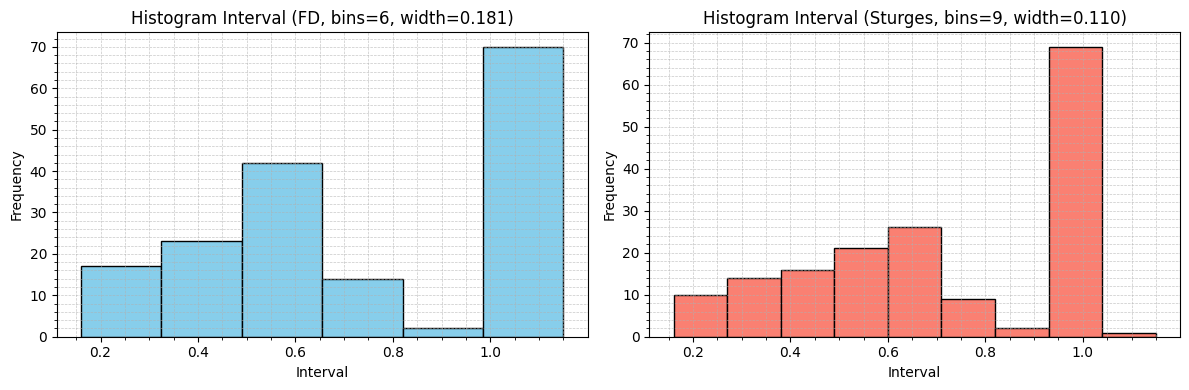


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.160,0.325,17
1,0.325,0.490,23
2,0.490,0.655,42
3,0.655,0.820,14
4,0.820,0.985,2
5,0.985,1.150,70



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.16,0.27,10
1,0.27,0.38,14
2,0.38,0.49,16
3,0.49,0.60,21
4,0.60,0.71,26
5,0.71,0.82,9
6,0.82,0.93,2
7,0.93,1.04,69
8,1.04,1.15,1


In [133]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd # Added import for pandas
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return int(np.sqrt(n)), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series):
    data = series.dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = stats.sem(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0] if n > 0 else None
    var = np.var(data, ddof=1)
    kurt = stats.kurtosis(data)
    skew = stats.skew(data)
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else None

    print("Descriptive statistics for Interval:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}")
    print(f"Sample Variance: {var:.6f}")
    print(f"Kurtosis: {kurt:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}")

def plot_interval_histograms(df_filtered):
    if 'Interval' not in df_filtered.columns:
        print("Kolom 'Interval' tidak ada di dataframe.")
        return

    data = df_filtered['Interval'].dropna()

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data)

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    print("\nBin calculation:")
    print(f"Freedman\u2013Diaconis -> bins: {bins_fd}, bin width: {h_fd:.6f}")
    print(f"Sturges -> bins: {bins_st}, bin width: {h_st:.6f}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman\u2013Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black') # Capture counts and edges
    axes[0].set_title(f"Histogram Interval (FD, bins={bins_fd}, width={h_fd:.3f})")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black') # Capture counts and edges
    axes[1].set_title(f"Histogram Interval (Sturges, bins={bins_st}, width={h_st:.3f})")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman\u2013Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
interval_data = plot_interval_histograms(df_filtered) # Corrected function call

In [134]:
# Pastikan df_filtered sudah ada
# Contoh: df_filtered = filter_data(df_block, "LIM", "RLIM")

# Minta input dari user
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter data sesuai input
df_interval = df_filtered[(df_filtered['Interval'] >= lower_bound) &
                       (df_filtered['Interval'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_interval)}")
display(df_interval.head(50))

Masukkan batas bawah (is greater than or equal to): 0.27
Masukkan batas atas (is less than or equal to): 1.04

Filtered rows: 157


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
2,CS8170210,BATU BERANI,Belambus_Selatan,1.20,2.00,0.80,1.00,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945
3,CS8170210,BATU BERANI,Belambus_Selatan,2.00,3.00,1.00,1.00,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881
4,CS8170210,BATU BERANI,Belambus_Selatan,3.00,3.60,0.60,1.00,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897
23,CS8170214,BATU BERANI,Belambus_Selatan,2.65,3.00,0.35,0.80,1.785,20.378,1.421,YLIM,None,LIM,LIM,2.180499,1.736154
24,CS8170214,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.00,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898
25,CS8170214,BATU BERANI,Belambus_Selatan,4.00,4.70,0.70,1.00,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942
43,CS8170215,BATU BERANI,Belambus_Selatan,4.00,4.65,0.65,1.00,2.924,34.234,1.923,YLIM,None,LIM,LIM,1.538649,1.011909
56,CS8170217,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.00,5.676,25.810,4.211,YLIM,None,LIM,LIM,1.941414,1.440326
57,CS8170217,BATU BERANI,Belambus_Selatan,4.00,5.00,1.00,0.90,5.183,22.053,4.040,YLIM,None,LIM,LIM,1.969765,1.535375
67,CS8170218,BATU BERANI,Belambus_Selatan,2.00,3.00,1.00,0.94,5.968,30.107,4.171,YLIM,None,LIM,LIM,2.171615,1.517808


# Filter By Recovery


Descriptive statistics for CoreRec:
Count: 157
Mean: 0.999172
Standard Error: 0.007409
Median: 1.0
Mode: 1.0
Standard Deviation: 0.092833
Sample Variance: 0.008618
Kurtosis: 6.289641
Skewness: 0.816690
Range: 0.7
Minimum: 0.7
Maximum: 1.4
Sum: 156.87
Confidence Level (95%): ±0.014635

Bin calculation:
Freedman–Diaconis -> bins=12, width=N/A
Sturges -> bins=9, width=0.077778


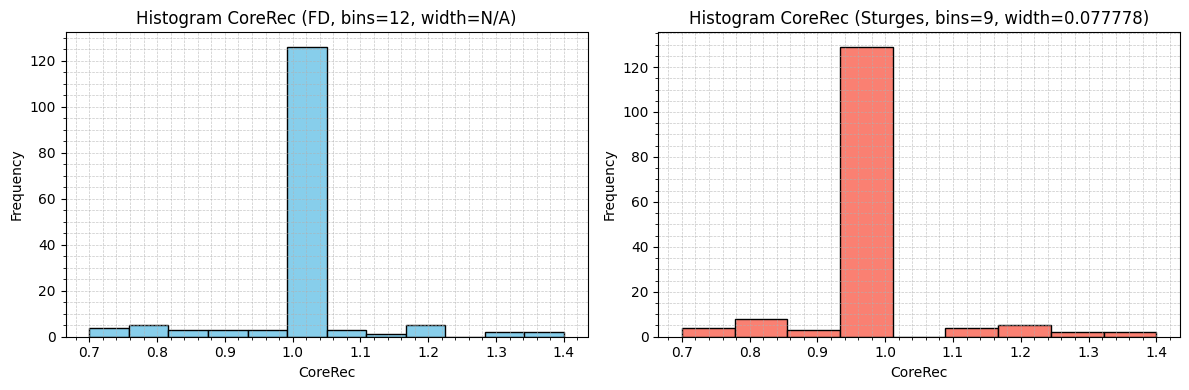


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.700000,0.758333,4
1,0.758333,0.816667,5
2,0.816667,0.875000,3
3,0.875000,0.933333,3
4,0.933333,0.991667,3
5,0.991667,1.050000,126
6,1.050000,1.108333,3
7,1.108333,1.166667,1
8,1.166667,1.225000,5
9,1.225000,1.283333,0



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.700000,0.777778,4
1,0.777778,0.855556,8
2,0.855556,0.933333,3
3,0.933333,1.011111,129
4,1.011111,1.088889,0
5,1.088889,1.166667,4
6,1.166667,1.244444,5
7,1.244444,1.322222,2
8,1.322222,1.400000,2


In [135]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="CoreRec"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_coreRec(df_interval):
    if 'CoreRec' not in df_interval.columns:
        print("Kolom 'CoreRec' tidak ada di dataframe.")
        return

    data = df_interval['CoreRec'].dropna()
    if data.empty:
        print("Tidak ada data 'CoreRec' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="CoreRec")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman\u2013Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman\u2013Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black') # Capture counts and edges
    axes[0].set_title(f"Histogram CoreRec (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("CoreRec")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black') # Capture counts and edges
    axes[1].set_title(f"Histogram CoreRec (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("CoreRec")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman\u2013Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
coreRec_data = analyze_coreRec(df_interval)

In [136]:
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))


df_recovery = df_interval[(df_interval['CoreRec'] >= lower_bound) &
                       (df_interval['CoreRec'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_recovery)}")
display(df_recovery.head(47))

Masukkan batas bawah (is greater than or equal to): 0.933333
Masukkan batas atas (is less than or equal to): 1.011111

Filtered rows: 129


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
2,CS8170210,BATU BERANI,Belambus_Selatan,1.200,2.000,0.800,1.00,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945
3,CS8170210,BATU BERANI,Belambus_Selatan,2.000,3.000,1.000,1.00,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881
4,CS8170210,BATU BERANI,Belambus_Selatan,3.000,3.600,0.600,1.00,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897
24,CS8170214,BATU BERANI,Belambus_Selatan,3.000,4.000,1.000,1.00,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898
25,CS8170214,BATU BERANI,Belambus_Selatan,4.000,4.700,0.700,1.00,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942
43,CS8170215,BATU BERANI,Belambus_Selatan,4.000,4.650,0.650,1.00,2.924,34.234,1.923,YLIM,None,LIM,LIM,1.538649,1.011909
56,CS8170217,BATU BERANI,Belambus_Selatan,3.000,4.000,1.000,1.00,5.676,25.810,4.211,YLIM,None,LIM,LIM,1.941414,1.440326
67,CS8170218,BATU BERANI,Belambus_Selatan,2.000,3.000,1.000,0.94,5.968,30.107,4.171,YLIM,None,LIM,LIM,2.171615,1.517808
69,CS8170218,BATU BERANI,Belambus_Selatan,4.000,4.800,0.800,1.00,3.741,33.440,2.490,YLIM,None,LIM,LIM,1.599460,1.064597
83,CS8170220,BATU BERANI,Belambus_Selatan,5.000,5.300,0.300,1.00,1.833,22.313,1.424,YLIM,None,LIM,LIM,2.089859,1.623545


# Filter By Wet Weight


Residual IQR acuan:
Q1: -0.645, Q3: 0.687, IQR: 1.333
Lower margin: -2.644, Upper margin: 2.686


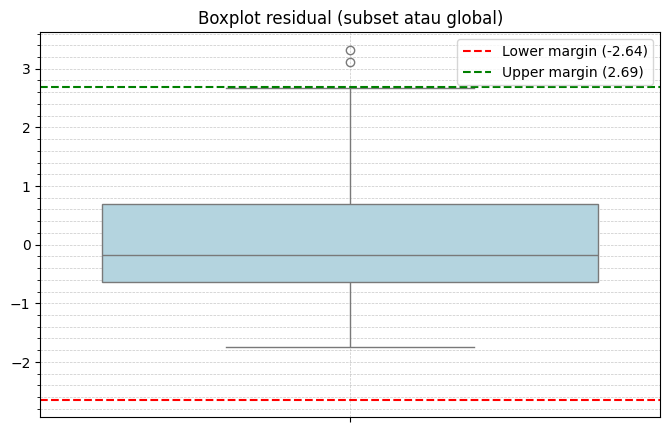

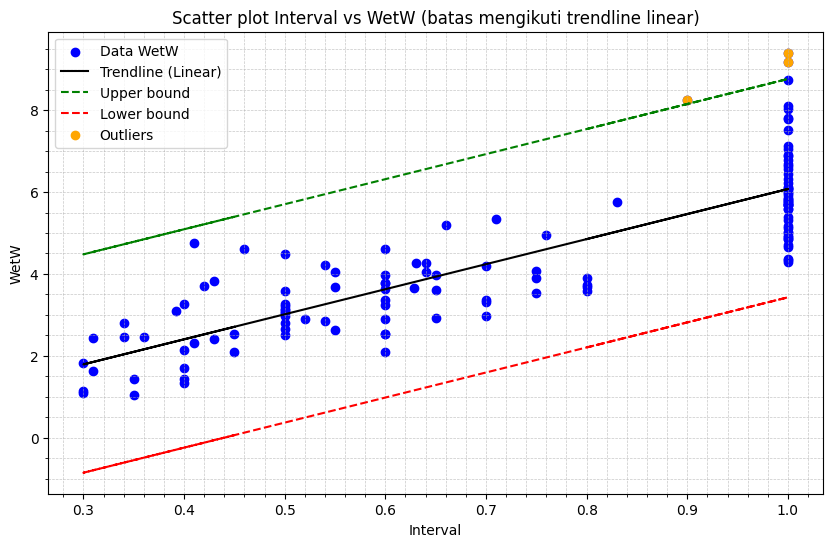


Outlier WetW berdasarkan trendline linear + IQR residual acuan:
         HoleId                       Hill        Hill_Group  From   To  \
320  CS8230815R  Belambus Blok 1 Spasi 100  Belambus_Selatan   4.0  4.9   
375   CS8230818  Belambus Blok 1 Spasi 100  Belambus_Selatan   4.0  5.0   
599   CS8230869  Belambus Blok 1 Spasi 100  Belambus_Selatan   3.0  4.0   

     Interval  CoreRec   WetW     H2O   DryW Material Layer NEW_LYR GEN_LYR  \
320       0.9      1.0  8.245  25.227  6.165     YLIM   LIM     LIM     LIM   
375       1.0      1.0  9.400  30.213  6.560     YLIM  YLIM     LIM     LIM   
599       1.0      1.0  9.185  29.069  6.515     YLIM   Lim     LIM     LIM   

          WTF       DTF  
320  3.123209  2.335304  
375  3.204651  2.236438  
599  3.131353  2.221096  


In [137]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['WetW'], color='blue', label='Data WetW')
    plt.plot(df_recovery['Interval'], y_pred, color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], y_pred + upper_margin, color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], y_pred + lower_margin, color='red', linestyle='--', label='Lower bound')

    # Outlier = data di luar batas trendline ± margin
    outliers = df_recovery[(df_recovery['WetW'] > y_pred + upper_margin) |
                           (df_recovery['WetW'] < y_pred + lower_margin)]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("WetW")
    plt.legend()
    plt.show()

    return {
        "outliers": outliers,
        "margins": {"lower": lower_margin, "upper": upper_margin},
        "trendline_coef": {"slope": model.coef_[0], "intercept": model.intercept_}
    }

# --- Contoh pemanggilan ---
result = detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
if result:
    print("\nOutlier WetW berdasarkan trendline linear + IQR residual acuan:")
    print(result["outliers"].head())

## Normalisasi Weight terhadap recovery

In [138]:
import numpy as np
from IPython.display import display

def normalize_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns or 'CoreRec' not in df_recovery.columns:
        print("Kolom 'WetW' atau 'CoreRec' tidak ada di dataframe.")
        return df_recovery

    # Buat kolom baru Normalized_WetW
    df_recovery['Normalized_WetW'] = np.where(
        df_recovery['CoreRec'] > 1.0,
        df_recovery['WetW'] / 1,          # jika CoreRec > 1.0
        df_recovery['WetW'] / df_recovery['CoreRec']  # jika CoreRec <= 1.0
    )

    print("\nNormalisasi WetW terhadap Recovery selesai.")
    # tampilkan seluruh dataframe dengan kolom tambahan
    display(df_recovery)

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = normalize_wetw(df_recovery)


Normalisasi WetW terhadap Recovery selesai.


/tmp/ipython-input-2539338653.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Normalized_WetW'] = np.where(


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
2,CS8170210,BATU BERANI,Belambus_Selatan,1.2,2.00,0.80,1.0,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945,3.573
3,CS8170210,BATU BERANI,Belambus_Selatan,2.0,3.00,1.00,1.0,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881,4.996
4,CS8170210,BATU BERANI,Belambus_Selatan,3.0,3.60,0.60,1.0,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897,2.544
24,CS8170214,BATU BERANI,Belambus_Selatan,3.0,4.00,1.00,1.0,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898,5.380
25,CS8170214,BATU BERANI,Belambus_Selatan,4.0,4.70,0.70,1.0,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942,3.372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,CS8230891,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.0,4.00,1.00,1.0,6.070,21.746,4.750,YLIM,Lim,LIM,LIM,2.069387,1.619372,6.070
759,CS8230891,Belambus Blok 1 Spasi 100,Belambus_Selatan,4.0,4.50,0.50,1.0,3.585,10.739,3.200,YLIM,Lim,LIM,LIM,2.444399,2.181890,3.585
828,CS8230898,Belambus Blok 1 Spasi 100,Belambus_Selatan,1.0,1.80,0.80,1.0,3.685,2.849,3.580,YLIM,None,LIM,LIM,1.570364,1.525619,3.685
831,CS8230898,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.4,3.00,0.60,1.0,2.085,3.837,2.005,YLIM,None,LIM,LIM,1.184698,1.139242,2.085



Residual IQR acuan:
Q1: -0.660, Q3: 0.673, IQR: 1.333
Lower margin: -2.658, Upper margin: 2.672


/tmp/ipython-input-1675437817.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
/tmp/ipython-input-1675437817.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Outlier_Status'] = [


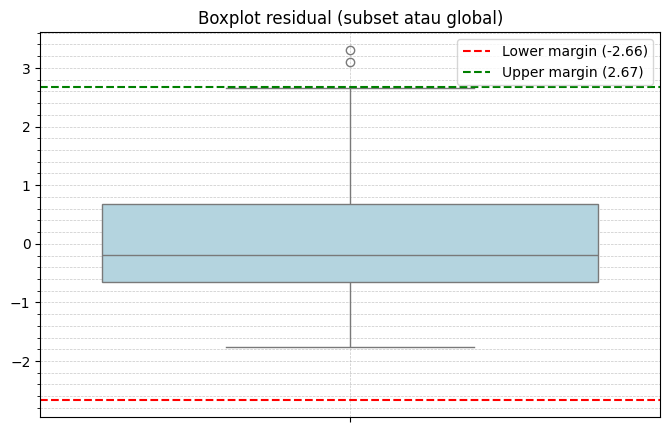

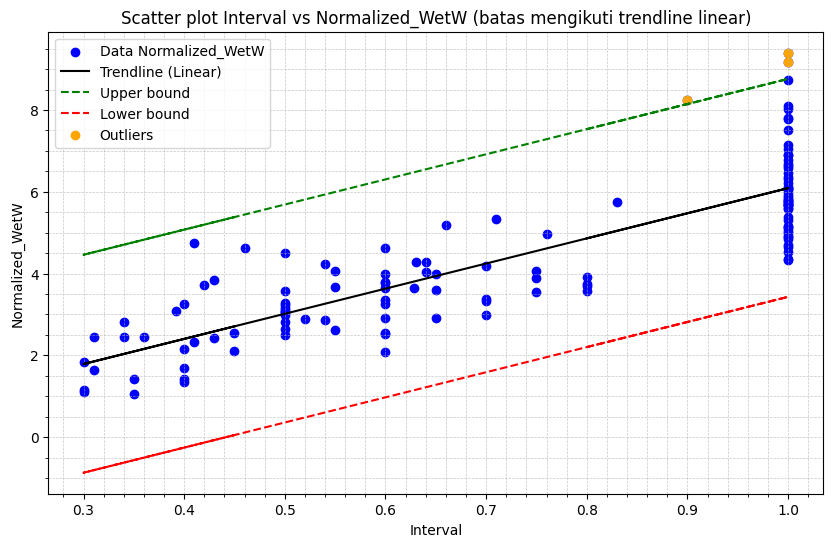

,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred,Outlier_Status
2,CS8170210,BATU BERANI,Belambus_Selatan,1.20,2.00,0.80,1.00,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945,3.573000,4.859538,Normal
3,CS8170210,BATU BERANI,Belambus_Selatan,2.00,3.00,1.00,1.00,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881,4.996000,6.088342,Normal
4,CS8170210,BATU BERANI,Belambus_Selatan,3.00,3.60,0.60,1.00,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897,2.544000,3.630734,Normal
24,CS8170214,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.00,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898,5.380000,6.088342,Normal
25,CS8170214,BATU BERANI,Belambus_Selatan,4.00,4.70,0.70,1.00,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942,3.372000,4.245136,Normal
43,CS8170215,BATU BERANI,Belambus_Selatan,4.00,4.65,0.65,1.00,2.924,34.234,1.923,YLIM,None,LIM,LIM,1.538649,1.011909,2.924000,3.937935,Normal
56,CS8170217,BATU BERANI,Belambus_Selatan,3.00,4.00,1.00,1.00,5.676,25.810,4.211,YLIM,None,LIM,LIM,1.941414,1.440326,5.676000,6.088342,Normal
67,CS8170218,BATU BERANI,Belambus_Selatan,2.00,3.00,1.00,0.94,5.968,30.107,4.171,YLIM,None,LIM,LIM,2.171615,1.517808,6.348936,6.088342,Normal
69,CS8170218,BATU BERANI,Belambus_Selatan,4.00,4.80,0.80,1.00,3.741,33.440,2.490,YLIM,None,LIM,LIM,1.599460,1.064597,3.741000,4.859538,Normal
83,CS8170220,BATU BERANI,Belambus_Selatan,5.00,5.30,0.30,1.00,1.833,22.313,1.424,YLIM,None,LIM,LIM,2.089859,1.623545,1.833000,1.787527,Normal


In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs Normalized_WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['Normalized_WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['Normalized_WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Tambahkan kolom status outlier ---
    def classify_outlier(val, pred):
        if val < pred + lower_margin:
            return "Outlier bawah"
        elif val > pred + upper_margin:
            return "Outlier atas"
        else:
            return "Normal"

    df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
    df_recovery['Outlier_Status'] = [
        classify_outlier(val, pred)
        for val, pred in zip(df_recovery['Normalized_WetW'], df_recovery['Trendline_Pred'])
    ]

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['Normalized_WetW'], color='blue', label='Data Normalized_WetW')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'], color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + upper_margin,
             color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + lower_margin,
             color='red', linestyle='--', label='Lower bound')

    # Outlier ditandai oranye
    outliers = df_recovery[df_recovery['Outlier_Status'] != "Normal"]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['Normalized_WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs Normalized_WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("Normalized_WetW")
    plt.legend()
    plt.show()

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
display(df_recovery.head(15))


Bin calculation:
Freedman–Diaconis -> bins=8, width=1.058824
Sturges -> bins=9, width=0.927222


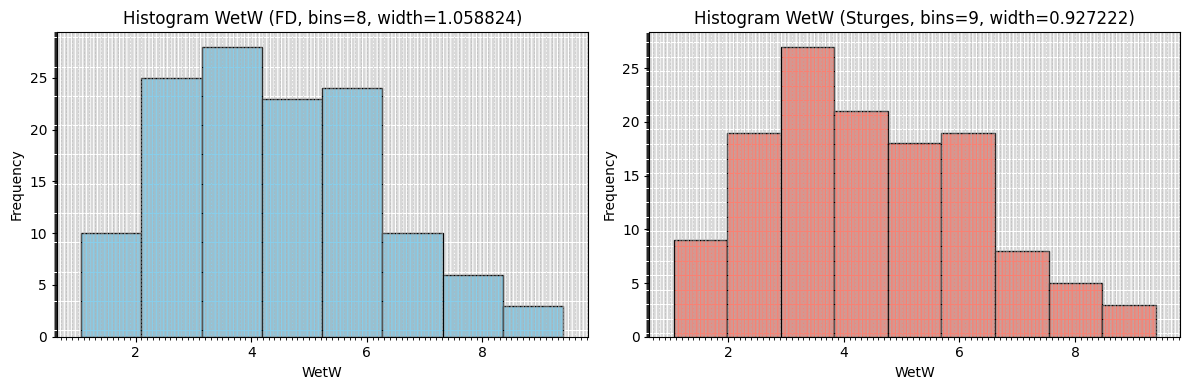


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,1.055000,2.098125,10
1,2.098125,3.141250,25
2,3.141250,4.184375,28
3,4.184375,5.227500,23
4,5.227500,6.270625,24
5,6.270625,7.313750,10
6,7.313750,8.356875,6
7,8.356875,9.400000,3



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,1.055000,1.982222,9
1,1.982222,2.909444,19
2,2.909444,3.836667,27
3,3.836667,4.763889,21
4,4.763889,5.691111,18
5,5.691111,6.618333,19
6,6.618333,7.545556,8
7,7.545556,8.472778,5
8,8.472778,9.400000,3


In [140]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def analyze_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns:
        print("Kolom 'WetW' tidak ada di dataframe.")
        return

    data = df_recovery['WetW'].dropna()
    if data.empty:
        print("Tidak ada data 'WetW' yang valid setelah drop NaN.")
        return

    # --- hitung jumlah bins ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram WetW (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("WetW")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram WetW (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("WetW")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
wetw_data = analyze_wetw(df_recovery)

In [141]:
import numpy as np
from IPython.display import display

def filter_wetw_normal(df_recovery, lower_bound, upper_bound):
    """
    Filter data WetW berdasarkan batas bawah/atas,
    sekaligus memastikan hanya baris dengan Outlier_Status = 'Normal' yang lolos.
    Setelah selesai, kolom Outlier_Status dihapus.
    """
    # --- Filter berdasarkan WetW ---
    df_wetw = df_recovery[(df_recovery['WetW'] >= lower_bound) &
                          (df_recovery['WetW'] <= upper_bound)].copy()

    # --- Pastikan hanya baris Normal yang lolos ---
    if 'Outlier_Status' in df_wetw.columns:
        df_wetw = df_wetw[df_wetw['Outlier_Status'] == "Normal"].copy()
        # Drop kolom Outlier_Status setelah selesai
        df_wetw = df_wetw.drop(columns=['Outlier_Status'])
    else:
        print("Kolom Outlier_Status tidak ditemukan, hanya filter WetW yang diterapkan.")

    print(f"\nFiltered rows (Normal only): {len(df_wetw)}")
    display(df_wetw.head(10))

    return df_wetw

# --- Contoh pemanggilan ---
lower_bound = float(input("Masukkan batas bawah (>=): "))
upper_bound = float(input("Masukkan batas atas (<=): "))

df_wetw = filter_wetw_normal(df_recovery, lower_bound, upper_bound)

Masukkan batas bawah (>=): 1.982222
Masukkan batas atas (<=): 6.618333

Filtered rows (Normal only): 104


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
2,CS8170210,BATU BERANI,Belambus_Selatan,1.2,2.00,0.80,1.00,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945,3.573000,4.859538
3,CS8170210,BATU BERANI,Belambus_Selatan,2.0,3.00,1.00,1.00,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881,4.996000,6.088342
4,CS8170210,BATU BERANI,Belambus_Selatan,3.0,3.60,0.60,1.00,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897,2.544000,3.630734
24,CS8170214,BATU BERANI,Belambus_Selatan,3.0,4.00,1.00,1.00,5.380,19.796,4.315,YLIM,None,LIM,LIM,1.840170,1.475898,5.380000,6.088342
25,CS8170214,BATU BERANI,Belambus_Selatan,4.0,4.70,0.70,1.00,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942,3.372000,4.245136
43,CS8170215,BATU BERANI,Belambus_Selatan,4.0,4.65,0.65,1.00,2.924,34.234,1.923,YLIM,None,LIM,LIM,1.538649,1.011909,2.924000,3.937935
56,CS8170217,BATU BERANI,Belambus_Selatan,3.0,4.00,1.00,1.00,5.676,25.810,4.211,YLIM,None,LIM,LIM,1.941414,1.440326,5.676000,6.088342
67,CS8170218,BATU BERANI,Belambus_Selatan,2.0,3.00,1.00,0.94,5.968,30.107,4.171,YLIM,None,LIM,LIM,2.171615,1.517808,6.348936,6.088342
69,CS8170218,BATU BERANI,Belambus_Selatan,4.0,4.80,0.80,1.00,3.741,33.440,2.490,YLIM,None,LIM,LIM,1.599460,1.064597,3.741000,4.859538
84,CS8170220,BATU BERANI,Belambus_Selatan,5.3,6.00,0.70,1.00,3.326,36.500,2.112,YLIM,None,LIM,LIM,1.625174,1.031981,3.326000,4.245136


#Filter By MC


Descriptive statistics for H2O:
Count: 104
Mean: 29.513885
Standard Error: 1.052009
Median: 30.3365
Mode: 45.205
Standard Deviation: 10.728429
Sample Variance: 115.099187
Kurtosis: 0.846489
Skewness: -0.153036
Range: 61.87599999999999
Minimum: 2.849
Maximum: 64.725
Sum: 3069.444
Confidence Level (95%): ±2.086412

Bin calculation:
Freedman–Diaconis -> bins=13, width=4.910403
Sturges -> bins=8, width=7.734500


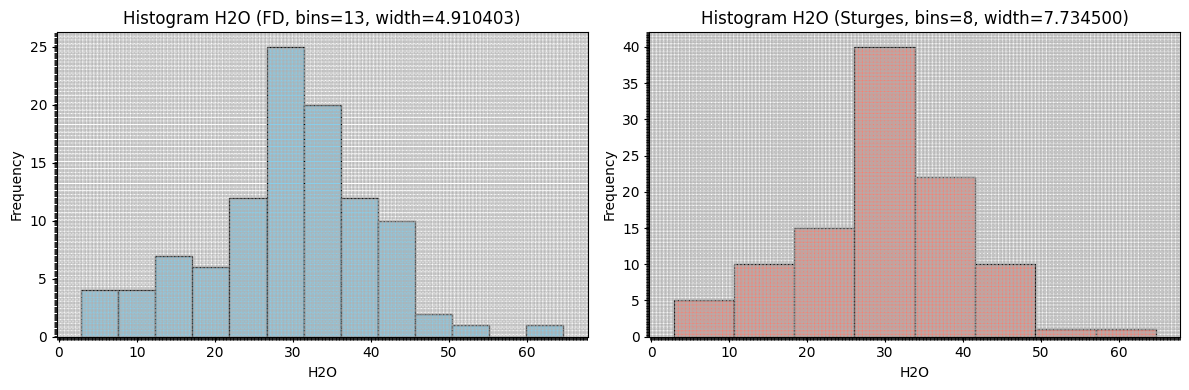


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,2.849000,7.608692,4
1,7.608692,12.368385,4
2,12.368385,17.128077,7
3,17.128077,21.887769,6
4,21.887769,26.647462,12
5,26.647462,31.407154,25
6,31.407154,36.166846,20
7,36.166846,40.926538,12
8,40.926538,45.686231,10
9,45.686231,50.445923,2



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,2.8490,10.5835,5
1,10.5835,18.3180,10
2,18.3180,26.0525,15
3,26.0525,33.7870,40
4,33.7870,41.5215,22
5,41.5215,49.2560,10
6,49.2560,56.9905,1
7,56.9905,64.7250,1


In [142]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="H2O"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_h2o(df_wetw):
    if 'H2O' not in df_wetw.columns:
        print("Kolom 'H2O' tidak ada di dataframe.")
        return

    data = df_wetw['H2O'].dropna()
    if data.empty:
        print("Tidak ada data 'H2O' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="H2O")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram H2O (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("H2O")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram H2O (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("H2O")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
h2o_data = analyze_h2o(df_wetw)

In [143]:

import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_wetw berdasarkan H2O
df_h2o = df_wetw[(df_wetw['H2O'] >= lower_bound) &
                 (df_wetw['H2O'] <= upper_bound)].copy()

print(f"\nFiltered rows (H2O): {len(df_h2o)}")
display(df_h2o.head(10))

is greater than or equal to: 21.887769
is less than or equal to: 45.686231

Filtered rows (H2O): 79


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
2,CS8170210,BATU BERANI,Belambus_Selatan,1.2,2.00,0.80,1.00,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945,3.573000,4.859538
3,CS8170210,BATU BERANI,Belambus_Selatan,2.0,3.00,1.00,1.00,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881,4.996000,6.088342
4,CS8170210,BATU BERANI,Belambus_Selatan,3.0,3.60,0.60,1.00,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897,2.544000,3.630734
25,CS8170214,BATU BERANI,Belambus_Selatan,4.0,4.70,0.70,1.00,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942,3.372000,4.245136
43,CS8170215,BATU BERANI,Belambus_Selatan,4.0,4.65,0.65,1.00,2.924,34.234,1.923,YLIM,None,LIM,LIM,1.538649,1.011909,2.924000,3.937935
56,CS8170217,BATU BERANI,Belambus_Selatan,3.0,4.00,1.00,1.00,5.676,25.810,4.211,YLIM,None,LIM,LIM,1.941414,1.440326,5.676000,6.088342
67,CS8170218,BATU BERANI,Belambus_Selatan,2.0,3.00,1.00,0.94,5.968,30.107,4.171,YLIM,None,LIM,LIM,2.171615,1.517808,6.348936,6.088342
69,CS8170218,BATU BERANI,Belambus_Selatan,4.0,4.80,0.80,1.00,3.741,33.440,2.490,YLIM,None,LIM,LIM,1.599460,1.064597,3.741000,4.859538
84,CS8170220,BATU BERANI,Belambus_Selatan,5.3,6.00,0.70,1.00,3.326,36.500,2.112,YLIM,None,LIM,LIM,1.625174,1.031981,3.326000,4.245136
85,CS8170220,BATU BERANI,Belambus_Selatan,6.0,6.60,0.60,1.00,2.909,43.039,1.657,YLIM,None,LIM,LIM,1.658319,0.944598,2.909000,3.630734


# Filter By DTF


Descriptive statistics for DTF:
Count: 79
Mean: 1.401341
Standard Error: 0.038177
Median: 1.361017974
Mode: 1.47618513
Standard Deviation: 0.339325
Sample Variance: 0.115142
Kurtosis: 1.521176
Skewness: 1.186065
Range: 1.653541728
Minimum: 0.877421331
Maximum: 2.530963059
Sum: 110.70594352799999
Confidence Level (95%): ±0.076005

Bin calculation:
Freedman–Diaconis -> bins=10, width=0.176066
Sturges -> bins=8, width=0.206693


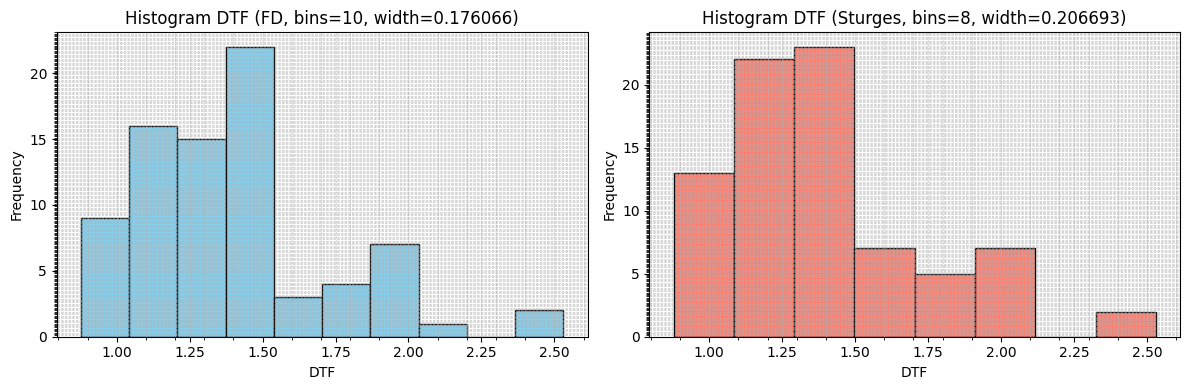


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.877421,1.042776,9
1,1.042776,1.208130,16
2,1.208130,1.373484,15
3,1.373484,1.538838,22
4,1.538838,1.704192,3
5,1.704192,1.869546,4
6,1.869546,2.034901,7
7,2.034901,2.200255,1
8,2.200255,2.365609,0
9,2.365609,2.530963,2



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.877421,1.084114,13
1,1.084114,1.290807,22
2,1.290807,1.497499,23
3,1.497499,1.704192,7
4,1.704192,1.910885,5
5,1.910885,2.117578,7
6,2.117578,2.324270,0
7,2.324270,2.530963,2


In [144]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="DTF"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_dtf(df_h2o):
    if 'DTF' not in df_h2o.columns:
        print("Kolom 'DTF' tidak ada di dataframe.")
        return

    data = df_h2o['DTF'].dropna()
    if data.empty:
        print("Tidak ada data 'DTF' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="DTF")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis
    counts_fd, edges_fd, _ = axes[0].hist(data, bins=bins_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram DTF (FD, bins={bins_fd}, width={width_fd_str})")
    axes[0].set_xlabel("DTF")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram DTF (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("DTF")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
dtf_data = analyze_dtf(df_h2o)

In [145]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_h2o berdasarkan DTF
df_dtf = df_h2o[(df_h2o['DTF'] >= lower_bound) &
                (df_h2o['DTF'] <= upper_bound)].copy()

print(f"\nFiltered rows (DTF): {len(df_dtf)}")
display(df_dtf.head(89))

is greater than or equal to: 0.877421
is less than or equal to: 1.538838

Filtered rows (DTF): 62


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
2,CS8170210,BATU BERANI,Belambus_Selatan,1.20,2.00,0.80,1.0,3.573,28.128,2.568,YLIM,None,LIM,LIM,1.527632,1.097945,3.573,4.859538
3,CS8170210,BATU BERANI,Belambus_Selatan,2.00,3.00,1.00,1.0,4.996,32.066,3.394,YLIM,None,LIM,LIM,1.708827,1.160881,4.996,6.088342
4,CS8170210,BATU BERANI,Belambus_Selatan,3.00,3.60,0.60,1.0,2.544,35.259,1.647,YLIM,None,LIM,LIM,1.450246,0.938897,2.544,3.630734
25,CS8170214,BATU BERANI,Belambus_Selatan,4.00,4.70,0.70,1.0,3.372,22.924,2.599,YLIM,None,LIM,LIM,1.647651,1.269942,3.372,4.245136
43,CS8170215,BATU BERANI,Belambus_Selatan,4.00,4.65,0.65,1.0,2.924,34.234,1.923,YLIM,None,LIM,LIM,1.538649,1.011909,2.924,3.937935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,CS8230880,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.00,4.00,1.00,1.0,4.330,30.947,2.990,YLIM,Lim,LIM,LIM,1.476185,1.019352,4.330,6.088342
662,CS8230880,Belambus Blok 1 Spasi 100,Belambus_Selatan,4.00,5.00,1.00,1.0,6.095,36.341,3.880,YLIM,Lim,LIM,LIM,2.077910,1.322771,6.095,6.088342
710,CS8230886,Belambus Blok 1 Spasi 100,Belambus_Selatan,2.40,3.00,0.60,1.0,3.360,27.083,2.450,YLIM,Lim,LIM,LIM,1.909154,1.392091,3.360,3.630734
711,CS8230886,Belambus Blok 1 Spasi 100,Belambus_Selatan,3.00,3.54,0.54,1.0,2.860,36.538,1.815,YLIM,Lim,LIM,LIM,1.805615,1.145871,2.860,3.262092


# SUMMARY

In [146]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(series, label):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

# --- Jalankan untuk semua kolom yang diminta ---
target_columns = ["Interval", "CoreRec", "WetW", "H2O", "DryW", "WTF", "DTF"]

for col in target_columns:
    if col in df_dtf.columns:
        descriptive_stats(df_dtf[col], label=col)
    else:
        print(f"\nKolom {col} tidak ditemukan di df_dtf.")


Descriptive statistics for Interval:
Count: 62
Mean: 0.791903
Standard Error: 0.027215
Median: 0.8
Mode: 1.0
Standard Deviation: 0.214293
Sample Variance: 0.045922
Kurtosis: -1.425047
Skewness: -0.320230
Range: 0.64
Minimum: 0.36
Maximum: 1.0
Sum: 49.098
Confidence Level (95%): ±0.054420

Descriptive statistics for CoreRec:
Count: 62
Mean: 0.997419
Standard Error: 0.001471
Median: 1.0
Mode: 1.0
Standard Deviation: 0.011585
Sample Variance: 0.000134
Kurtosis: 16.410748
Skewness: -4.268164
Range: 0.06000000000000005
Minimum: 0.94
Maximum: 1.0
Sum: 61.84
Confidence Level (95%): ±0.002942

Descriptive statistics for WetW:
Count: 62
Mean: 4.363694
Standard Error: 0.161266
Median: 4.2775
Mode: 5.685
Standard Deviation: 1.269807
Sample Variance: 1.612409
Kurtosis: -1.271986
Skewness: 0.043220
Range: 4.425000000000001
Minimum: 2.145
Maximum: 6.57
Sum: 270.54900000000004
Confidence Level (95%): ±0.322471

Descriptive statistics for H2O:
Count: 62
Mean: 33.356726
Standard Error: 0.755335
Median

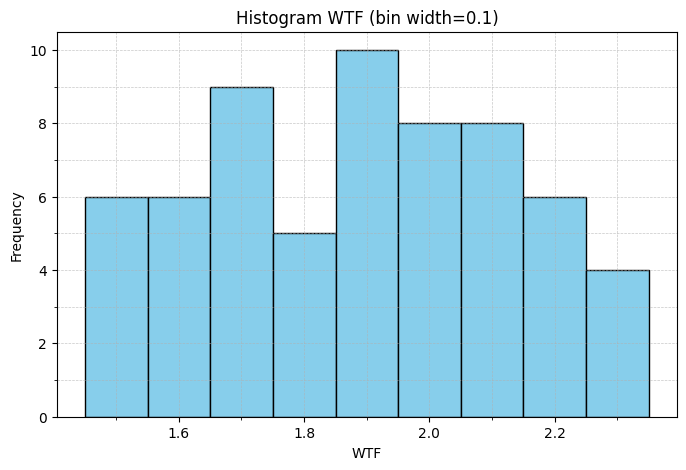


Tabel Histogram WTF:


,Bin Start,Bin End,Frequency
0,1.450246,1.550246,6
1,1.550246,1.650246,6
2,1.650246,1.750246,9
3,1.750246,1.850246,5
4,1.850246,1.950246,10
5,1.950246,2.050246,8
6,2.050246,2.150246,8
7,2.150246,2.250246,6
8,2.250246,2.350246,4


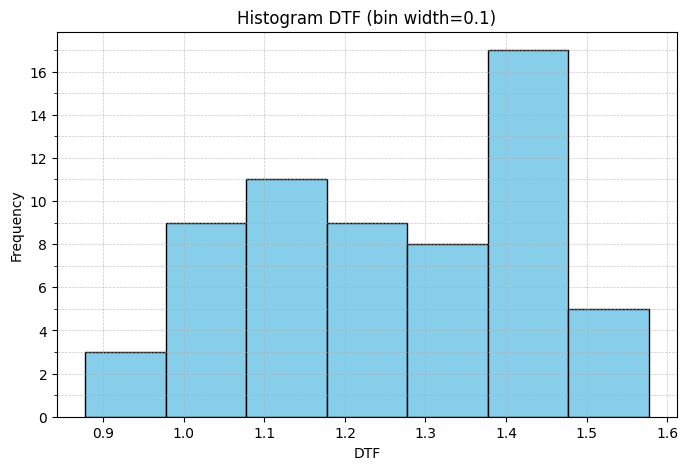


Tabel Histogram DTF:


,Bin Start,Bin End,Frequency
0,0.877421,0.977421,3
1,0.977421,1.077421,9
2,1.077421,1.177421,11
3,1.177421,1.277421,9
4,1.277421,1.377421,8
5,1.377421,1.477421,17
6,1.477421,1.577421,5


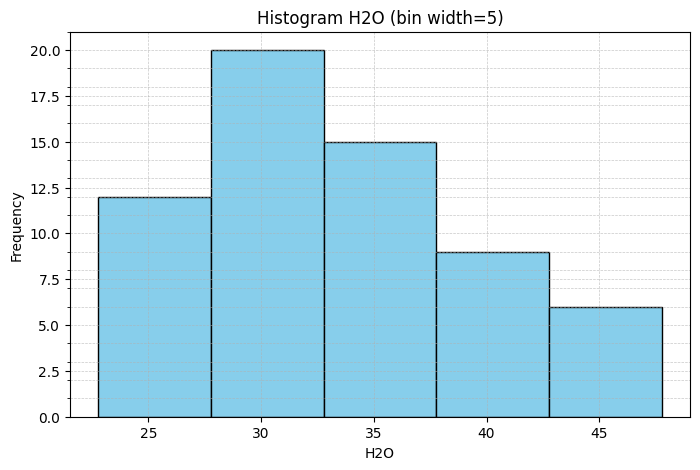


Tabel Histogram H2O:


,Bin Start,Bin End,Frequency
0,22.776,27.776,12
1,27.776,32.776,20
2,32.776,37.776,15
3,37.776,42.776,9
4,42.776,47.776,6


In [150]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

def plot_histogram_fixed_width(series, bin_width, label):
    data = series.dropna().values
    if len(data) == 0:
        print(f"Tidak ada data untuk {label}.")
        return None

    # Tentukan bins berdasarkan bin_width
    min_val, max_val = data.min(), data.max()
    bins = np.arange(min_val, max_val + bin_width, bin_width)

    # Plot histogram
    plt.figure(figsize=(8,5))
    counts, edges, _ = plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram {label} (bin width={bin_width})")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    # Minor ticks sesuai bin width
    plt.gca().xaxis.set_minor_locator(MultipleLocator(bin_width))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    # Buat tabel histogram
    table = pd.DataFrame({
        "Bin Start": edges[:-1],
        "Bin End": edges[1:],
        "Frequency": counts.astype(int)
    })

    print(f"\nTabel Histogram {label}:")
    display(table)
    return table

# --- Contoh pemanggilan ---
table_wtf = plot_histogram_fixed_width(df_dtf['WTF'], bin_width=0.1, label="WTF")
table_dtf = plot_histogram_fixed_width(df_dtf['DTF'], bin_width=0.1, label="DTF")
table_h2o = plot_histogram_fixed_width(df_dtf['H2O'], bin_width=5, label="H2O")

In [152]:
import pandas as pd

# Input nama Block, GEN_LYR, dan Material
block_name = input("Masukkan nama Block: ")
gen_lyr = input("Masukkan GEN_LYR: ")
material = input("Masukkan Material: ")

# Hitung nilai ringkasan (contoh: mean)
summary = {
    "Block": block_name,
    "GEN_LYR": gen_lyr,
    "Material": material,
    "Interval_mean": df_dtf['Interval'].dropna().mean(),
    "CoreRec_mean": df_dtf['CoreRec'].dropna().mean(),
    "WetW_mean": df_dtf['WetW'].dropna().mean(),
    "H2O_mean": df_dtf['H2O'].dropna().mean(),
    "DryW_mean": df_dtf['DryW'].dropna().mean(),
    "WTF_mean": df_dtf['WTF'].dropna().mean(),
    "DTF_mean": df_dtf['DTF'].dropna().mean()
}

# Buat nama variabel DataFrame sesuai input
var_name = f"df_{block_name.replace(' ', '_').lower()}_{gen_lyr.lower()}_{material.lower()}"
globals()[var_name] = pd.DataFrame([summary])

print(f"\nTabel Ringkasan tersimpan sebagai variabel: {var_name}")
display(globals()[var_name])

Masukkan nama Block: Belambus Selatan
Masukkan GEN_LYR: LIM
Masukkan Material: YLIM

Tabel Ringkasan tersimpan sebagai variabel: df_belambus_selatan_lim_ylim


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,LIM,YLIM,0.791903,0.997419,4.363694,33.356726,2.915016,1.89267,1.25874
